In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Correct paths to benign and malignant folders
dataset_path = '/content/drive/MyDrive/melanoma_cancer_dataset'

# Paths to benign and malignant folders
benign_folder_path = os.path.join(dataset_path, 'benign')
malignant_folder_path = os.path.join(dataset_path, 'malignant')

# Verify the contents of both folders
print("Benign folder contents:", os.listdir(benign_folder_path))
if os.path.exists(malignant_folder_path):
    print("Malignant folder contents:", os.listdir(malignant_folder_path))
else:
    print(f"Malignant folder not found at: {malignant_folder_path}")

Benign folder contents: ['melanoma_74.jpg', 'melanoma_104.jpg', 'melanoma_63.jpg', 'melanoma_8.jpg', 'melanoma_44.jpg', 'melanoma_79.jpg', 'melanoma_14.jpg', 'melanoma_25.jpg', 'melanoma_71.jpg', 'melanoma_22.jpg', 'melanoma_23.jpg', 'melanoma_26.jpg', 'melanoma_68.jpg', 'melanoma_55.jpg', 'melanoma_98.jpg', 'melanoma_65.jpg', 'melanoma_86.jpg', 'melanoma_76.jpg', 'melanoma_59.jpg', 'melanoma_3.jpg', 'melanoma_18.jpg', 'melanoma_38.jpg', 'melanoma_21.jpg', 'melanoma_4.jpg', 'melanoma_70.jpg', 'melanoma_15.jpg', 'melanoma_9.jpg', 'melanoma_78.jpg', 'melanoma_57.jpg', 'melanoma_32.jpg', 'melanoma_99.jpg', 'melanoma_36.jpg', 'melanoma_34.jpg', 'melanoma_29.jpg', 'melanoma_27.jpg', 'melanoma_17.jpg', 'melanoma_72.jpg', 'melanoma_64.jpg', 'melanoma_12.jpg', 'melanoma_54.jpg', 'melanoma_88.jpg', 'melanoma_60.jpg', 'melanoma_19.jpg', 'melanoma_87.jpg', 'melanoma_28.jpg', 'melanoma_107.jpg', 'melanoma_62.jpg', 'melanoma_45.jpg', 'melanoma_0.jpg', 'melanoma_24.jpg', 'melanoma_6.jpg', 'melanoma_

In [ ]:
# List the contents of the melanoma_cancer_dataset folder to verify folder names
dataset_path = '/content/drive/MyDrive/melanoma_cancer_dataset'
print("Contents of the melanoma_cancer_dataset folder:", os.listdir(dataset_path))


Contents of the melanoma_cancer_dataset folder: ['malignat', 'benign']


In [ ]:
# Correct the folder name for 'malignant'
malignant_folder_path = os.path.join(dataset_path, 'malignat')

# Verify the contents of both folders
print("Benign folder contents:", os.listdir(benign_folder_path))
print("Malignant folder contents:", os.listdir(malignant_folder_path))


Benign folder contents: ['melanoma_74.jpg', 'melanoma_104.jpg', 'melanoma_63.jpg', 'melanoma_8.jpg', 'melanoma_44.jpg', 'melanoma_79.jpg', 'melanoma_14.jpg', 'melanoma_25.jpg', 'melanoma_71.jpg', 'melanoma_22.jpg', 'melanoma_23.jpg', 'melanoma_26.jpg', 'melanoma_68.jpg', 'melanoma_55.jpg', 'melanoma_98.jpg', 'melanoma_65.jpg', 'melanoma_86.jpg', 'melanoma_76.jpg', 'melanoma_59.jpg', 'melanoma_3.jpg', 'melanoma_18.jpg', 'melanoma_38.jpg', 'melanoma_21.jpg', 'melanoma_4.jpg', 'melanoma_70.jpg', 'melanoma_15.jpg', 'melanoma_9.jpg', 'melanoma_78.jpg', 'melanoma_57.jpg', 'melanoma_32.jpg', 'melanoma_99.jpg', 'melanoma_36.jpg', 'melanoma_34.jpg', 'melanoma_29.jpg', 'melanoma_27.jpg', 'melanoma_17.jpg', 'melanoma_72.jpg', 'melanoma_64.jpg', 'melanoma_12.jpg', 'melanoma_54.jpg', 'melanoma_88.jpg', 'melanoma_60.jpg', 'melanoma_19.jpg', 'melanoma_87.jpg', 'melanoma_28.jpg', 'melanoma_107.jpg', 'melanoma_62.jpg', 'melanoma_45.jpg', 'melanoma_0.jpg', 'melanoma_24.jpg', 'melanoma_6.jpg', 'melanoma_

Resized benign images shape: (1001, 224, 224, 3)
Resized malignant images shape: (1000, 224, 224, 3)


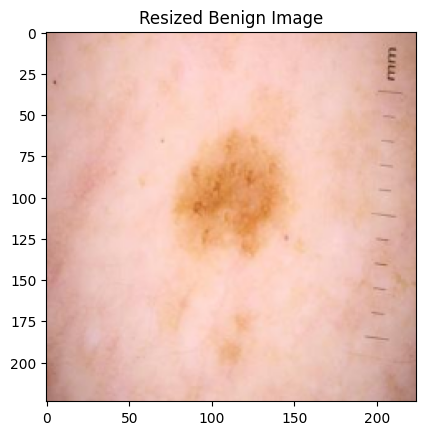

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the target size for resizing images (224x224 is common for CNN models)
target_size = (224, 224)

# Path to your benign and malignant image folders
benign_folder_path = '/content/drive/MyDrive/melanoma_cancer_dataset/benign'
malignant_folder_path = '/content/drive/MyDrive/melanoma_cancer_dataset/malignat'  # Corrected folder name

# Function to resize images in a folder
def resize_images(folder_path):
    resized_images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, target_size)
            resized_images.append(img_resized)
    return np.array(resized_images)

# Resize images in both folders
benign_resized = resize_images(benign_folder_path)
malignant_resized = resize_images(malignant_folder_path)

# Check the shape of resized images
print(f"Resized benign images shape: {benign_resized.shape}")
print(f"Resized malignant images shape: {malignant_resized.shape}")

# Display a sample image to check if resizing worked
plt.imshow(cv2.cvtColor(benign_resized[0], cv2.COLOR_BGR2RGB))
plt.title("Resized Benign Image")
plt.show()


Enhanced benign images shape: (1001, 224, 224, 3)
Enhanced malignant images shape: (1000, 224, 224, 3)


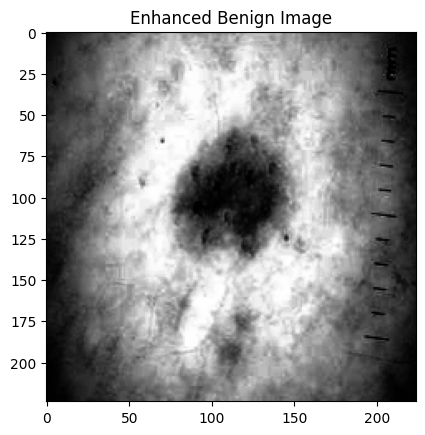

In [ ]:
# Function for contrast enhancement and normalization
def enhance_and_normalize(images):
    enhanced_images = []
    for img in images:
        # Convert the image to grayscale (for contrast enhancement)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization to enhance contrast
        equalized_img = cv2.equalizeHist(gray_img)

        # Convert back to BGR (3 channels) to match the input format
        enhanced_img = cv2.cvtColor(equalized_img, cv2.COLOR_GRAY2BGR)

        # Normalize the image: convert to float32 and scale pixel values to [0, 1]
        normalized_img = enhanced_img.astype('float32') / 255.0

        enhanced_images.append(normalized_img)

    return np.array(enhanced_images)

# Apply contrast enhancement and normalization to both benign and malignant images
benign_enhanced = enhance_and_normalize(benign_resized)
malignant_enhanced = enhance_and_normalize(malignant_resized)

# Check the shape of the enhanced images
print(f"Enhanced benign images shape: {benign_enhanced.shape}")
print(f"Enhanced malignant images shape: {malignant_enhanced.shape}")

# Display a sample enhanced benign image
plt.imshow(benign_enhanced[0])
plt.title("Enhanced Benign Image")
plt.show()


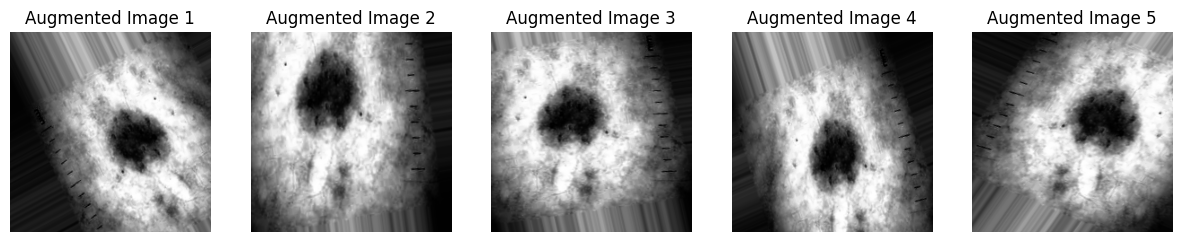

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,        # Random rotation
    width_shift_range=0.2,    # Random width shift
    height_shift_range=0.2,   # Random height shift
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Zoom in/out
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest'       # Fill missing pixels after transformation
)

# Choose a sample image to augment
sample_image = benign_enhanced[0]  # Take the first image from the benign dataset

# Reshape image to match the expected format (1, height, width, channels)
sample_image = np.expand_dims(sample_image, axis=0)

# Generate augmented images
augmented_images = datagen.flow(sample_image, batch_size=1)

# Display a few augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    augmented_image = next(augmented_images)[0].astype('float32')
    axes[i].imshow(augmented_image)
    axes[i].axis('off')
    axes[i].set_title(f"Augmented Image {i+1}")
plt.show()


In [ ]:
# If you want to trim the larger dataset to match the smaller one
benign_enhanced = benign_enhanced[:1000]  # Trim to match malignant dataset size



In [ ]:
import os
import shutil
from google.colab import files

# Specify the folder containing the processed images
processed_images_folder = '/content/processed_images/'  # Change to your folder's path

# Create the folder if it doesn't exist
os.makedirs(processed_images_folder, exist_ok=True)

# Example: Save a sample image to processed_images_folder
# Here, you should replace this with your actual image-saving code
# For example, saving the processed images to the folder
# This is just an example - replace with your actual saving mechanism
# from PIL import Image
# img = Image.open('/path/to/image.jpg')
# img.save(os.path.join(processed_images_folder, 'image1.jpg'))

# Check if the folder contains images (you can also use your own code to save images)
print("Images in processed folder:", os.listdir(processed_images_folder))

# Path to the output zip file
zip_file = '/content/processed_images.zip'

# Compress the folder into a zip file
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', processed_images_folder)

# Download the zip file to your local machine
files.download(zip_file)



Images in processed folder: []


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>